In [60]:
import numpy as np
import pandas as pd
from word2number import w2n
from sklearn import linear_model

In [61]:
ds = pd.read_csv("/home/prasun/GitDemo/Stat_ML-Learning/Exercise2/dataset.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [62]:
# have a look
print(ds.experience)

0       NaN
1       NaN
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object


In [63]:
# Word2Number Convertion
ds["experience"] = ds.experience.map(lambda x: w2n.word_to_num(x), na_action= "ignore")

In [64]:
fix1 = ds.experience.median()
fix2 = ds["test_score(out of 10)"].median()
ds["experience"] =  ds.experience.fillna(0) 
ds["test_score(out of 10)"] = ds["test_score(out of 10)"].fillna(fix2)
print(ds)

   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0         0.0                    8.0                           9      50000
1         0.0                    8.0                           6      45000
2         5.0                    6.0                           7      60000
3         2.0                   10.0                          10      65000
4         7.0                    9.0                           6      70000
5         3.0                    7.0                          10      62000
6        10.0                    8.0                           7      72000
7        11.0                    7.0                           8      80000


array([[<Axes: xlabel='experience', ylabel='experience'>,
        <Axes: xlabel='test_score(out of 10)', ylabel='experience'>,
        <Axes: xlabel='interview_score(out of 10)', ylabel='experience'>,
        <Axes: xlabel='salary($)', ylabel='experience'>],
       [<Axes: xlabel='experience', ylabel='test_score(out of 10)'>,
        <Axes: xlabel='test_score(out of 10)', ylabel='test_score(out of 10)'>,
        <Axes: xlabel='interview_score(out of 10)', ylabel='test_score(out of 10)'>,
        <Axes: xlabel='salary($)', ylabel='test_score(out of 10)'>],
       [<Axes: xlabel='experience', ylabel='interview_score(out of 10)'>,
        <Axes: xlabel='test_score(out of 10)', ylabel='interview_score(out of 10)'>,
        <Axes: xlabel='interview_score(out of 10)', ylabel='interview_score(out of 10)'>,
        <Axes: xlabel='salary($)', ylabel='interview_score(out of 10)'>],
       [<Axes: xlabel='experience', ylabel='salary($)'>,
        <Axes: xlabel='test_score(out of 10)', ylabel='sal

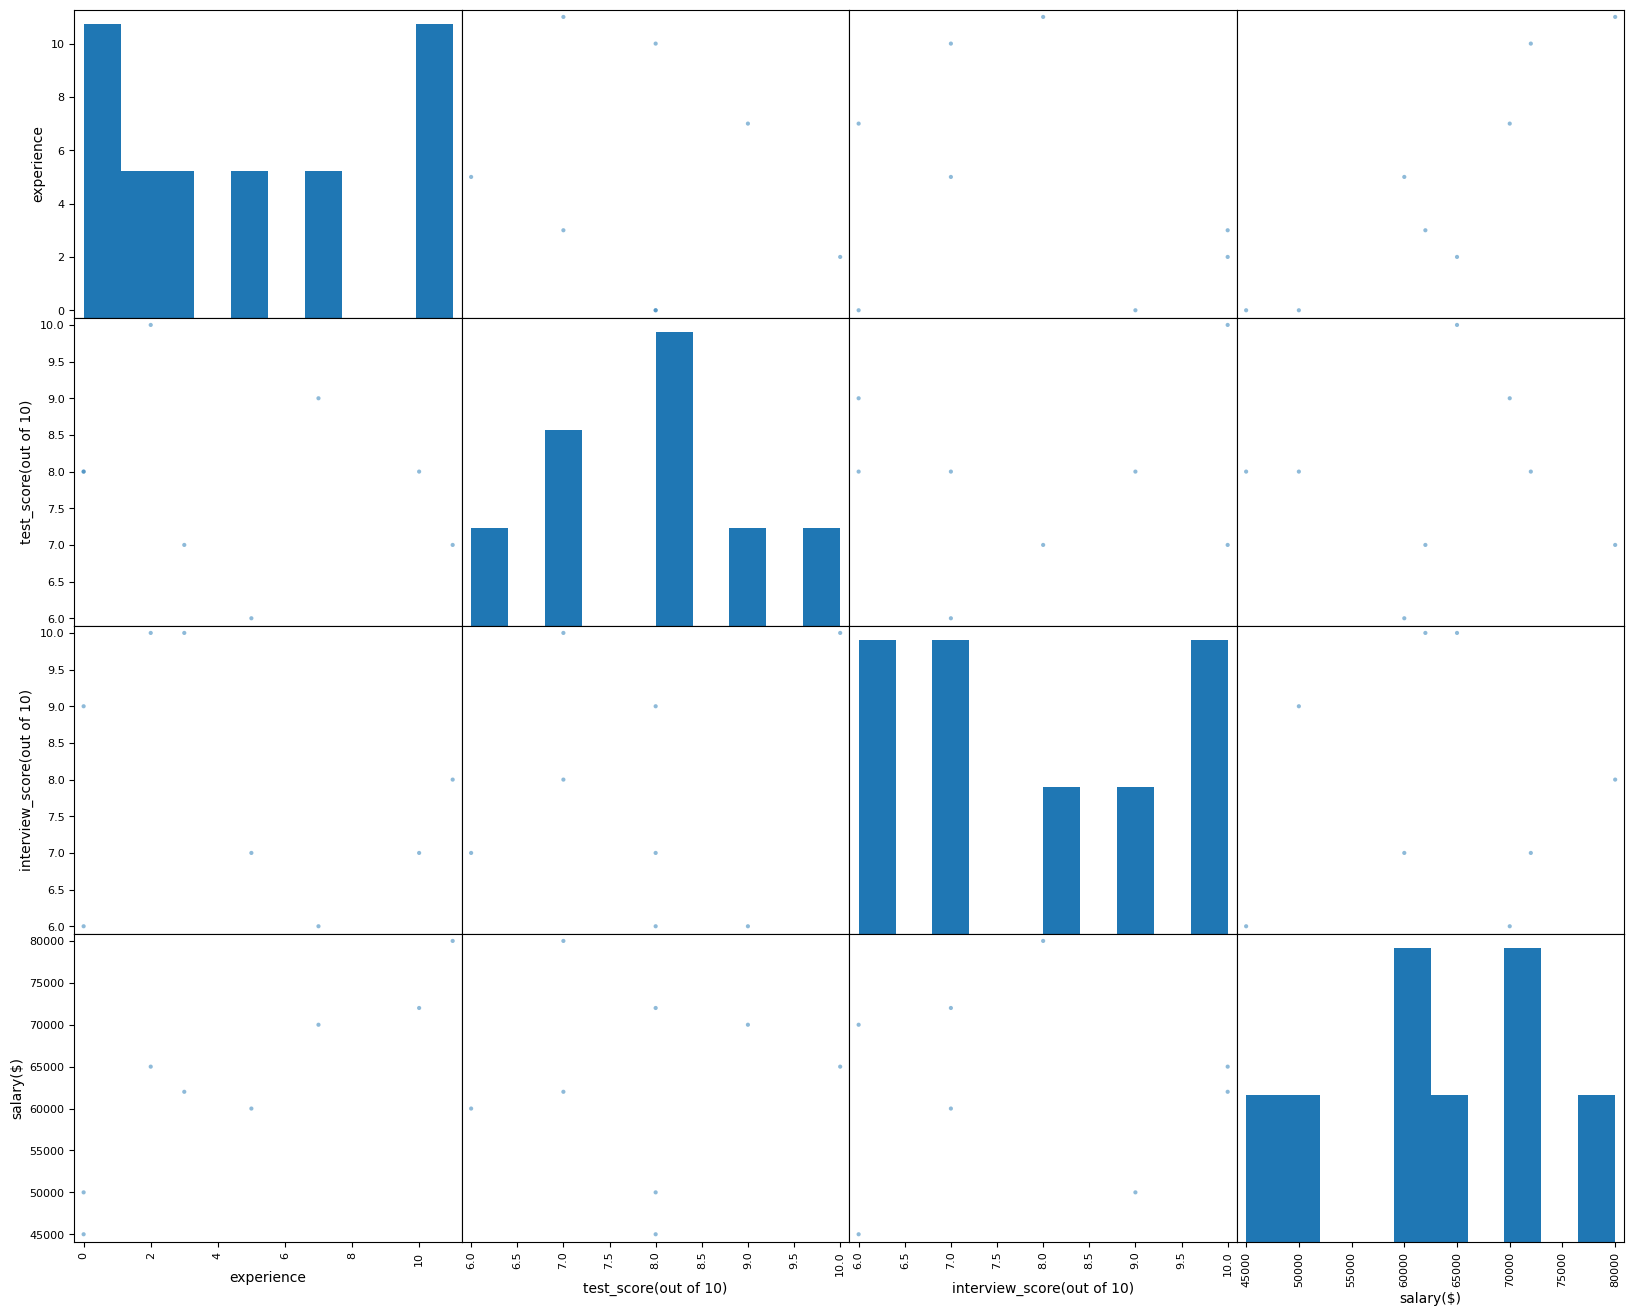

In [65]:
from pandas.plotting import scatter_matrix
attrib = ["experience","test_score(out of 10)","interview_score(out of 10)",	"salary($)"]
scatter_matrix(ds[attrib], figsize=(20,16))

In [66]:
# Train Set
X = ds[["experience","test_score(out of 10)","interview_score(out of 10)"]]
y = ds[["salary($)"]]

In [67]:
# Model Fitting
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [69]:
print(reg.coef_)
print(reg.intercept_)

[[2812.95487627 1845.70596798 2205.24017467]]
[17737.26346434]


In [70]:
# Time to Predict
reg.predict([[2,9,6],[12,10,10]])

/home/prasun/python_workspace/penv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[53205.96797671],
       [92002.18340611]])